## Code for analysis and plotting of scattering data
To plot scattering profiles, this code takes three input files of experimental (3 files: low conc. SERF alone ('SERF_0.56mM.dat'), TAR alone ('TAR_alone_clean.dat'), and the complex ('serf-tar_clean.dat')) scattering data. These must be formatted as three-column .dat files, in which the columns are: q, I(q), and error. The input file 'sim_fitted_out.dat' is the FoxS-calculated scattering profile after re-scaling against the low-concentration experimental dataset.


In [2]:
## import packages ##

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import pandas as pd
import bioxtasraw.RAWAPI as raw

In [10]:
## import scattering profiles via raw ##

sim = raw.load_profiles('sim_fitted_out.dat')[0]
serf = raw.load_profiles('serf_alone_clean.dat')[0]
tar = raw.load_profiles('TAR_alone_clean.dat')[0]
both = raw.load_profiles('serf-tar_clean.dat')[0]

In [28]:
## assign variables to make downstream calculations & plotting easier ##

q_serf = serf.getQ()
I_serf = serf.getI()
err_serf = serf.getErr()

q_tar = tar.getQ()
I_tar = tar.getI()
err_tar = tar.getErr()

q_both = both.getQ()
I_both = both.getI()
err_both = both.getErr()

# must truncate the first 8 points of the SERF dataset (q region goes slightly lower than TAR)
I_sum = I_serf + I_tar

/home/usher/miniconda3/envs/labconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


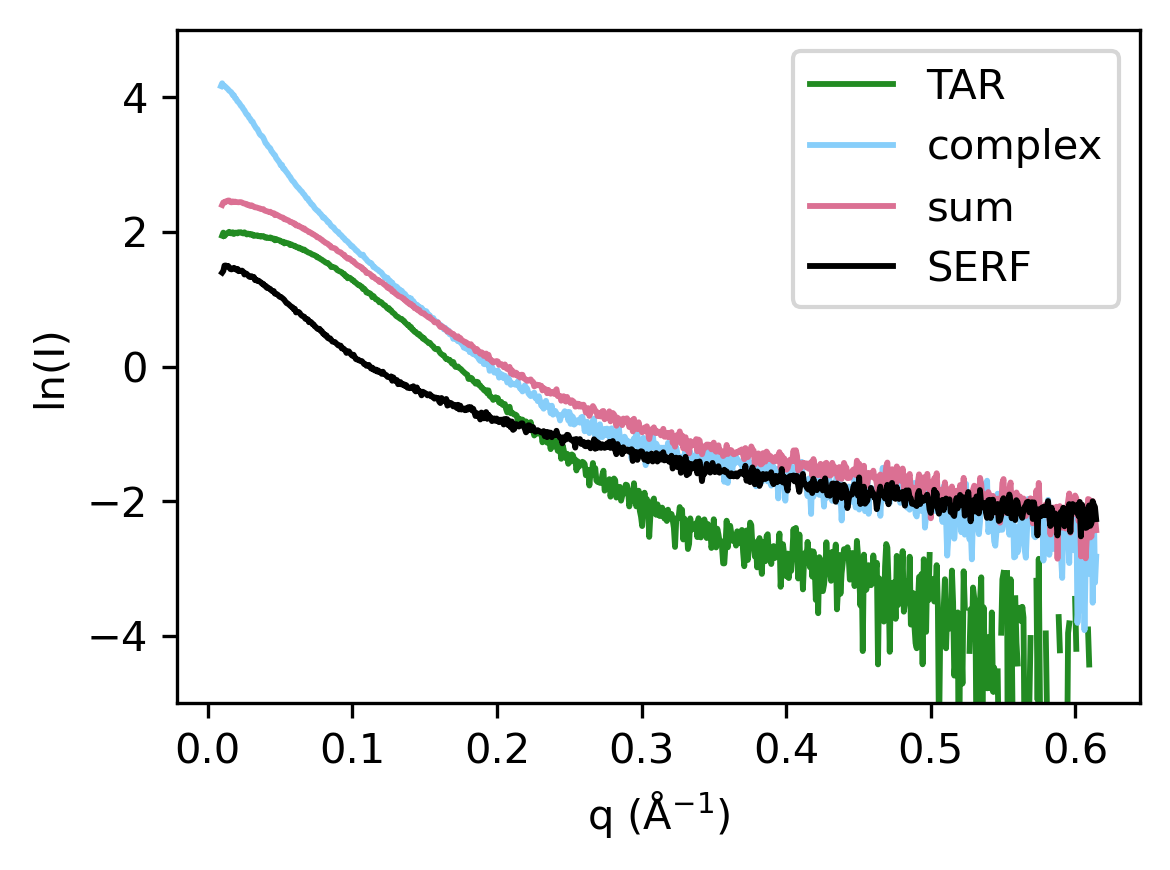

In [31]:
## plot scattering profiles (ln I(q) vs. q) ##
plt.figure(figsize = (4,3), dpi = 300)

plt.plot(q_tar, np.log(I_tar), color = 'forestgreen', lw = 1.4, label = 'TAR')
plt.plot(q_both, np.log(I_both), color = 'lightskyblue', lw = 1.4, label = 'complex')
plt.plot(q_tar, np.log(I_sum), color = 'palevioletred', lw = 1.4, label = 'sum')
plt.plot(q_serf, np.log(I_serf), color = 'k', lw = 1.4, label = 'SERF')

plt.ylabel('ln(I)')
plt.xlabel(r'q $(\mathrm{\AA}^{-1})$')

#plt.xlim(0.005, 0.38)
plt.ylim(-5, 5)
plt.legend(loc = 'best')

plt.tight_layout()

# UNCOMMENT below to save figure as PDF
#plt.savefig('Figure_S2C_complex_saxs_profiles.pdf', format = 'pdf', dpi = 300)

plt.show()